In [116]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely.geometry
import seaborn as sns
import plotly.express as px
import re
from matplotlib.colors import TwoSlopeNorm
import missingno as msno
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import math

In [117]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pd.set_option('display.max_columns', None)

In [118]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200

In [119]:
# Projected Coordinate System: how you project onto a 2D plane
epsg_2d = 26717 
# Toronto Police Service Open Data includes geographic location information provided in
# the projected coordinate system NAD 1927 UTM 17N
# https://epsg.io/26717

# Geographic Coordinate System: how coordinates are represented in a 3D space
# World Geodetic System 1984 (WGS84)
# https://epsg.io/4326
epsg_3d = 4326 

In [5]:
stations_point = gpd.read_file('../data/processed/stations_point.geojson')
stations_area = gpd.read_file('../data/processed/stations_area.geojson')

# Import major crime indicators

















































































































































































































In [120]:
# geojson format is too big -> use csv instead
mci_select = pd.read_csv('../data/processed/mci_select.csv')
# mci_select['geometry'] = mci_select.apply(lambda x: shapely.geometry.Point(x['longitude'], x['latitude']), axis=1)
# mci_select = gpd.GeoDataFrame(mci_select, crs='epsg:' + str(epsg_3d), geometry='geometry')

C:\Users\willi\AppData\Local\Temp\ipykernel_25804\54038892.py:2: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



In [121]:
mci_select

occurrence_unique_id      occurrence_date  occurrence_year  \
0            GO-20141625305  2014-03-02 13:00:00             2014   
1            GO-20141297201  2014-01-03 13:00:00             2014   
2            GO-20141302953  2014-01-08 13:00:00             2014   
3            GO-20141304312  2014-01-08 13:00:00             2014   
4            GO-20141303907  2014-01-06 13:00:00             2014   
...                     ...                  ...              ...   
280667       GO-20143053896  2014-10-06 12:00:00             2014   
280668       GO-20143094406  2014-10-13 12:00:00             2014   
280669       GO-20143107536  2014-10-15 12:00:00             2014   
280670       GO-20143208371  2014-10-30 12:00:00             2014   
280671       GO-20143252379  2014-11-06 13:00:00             2014   

       occurrence_month  occurrence_day  occurrence_dayofyear  \
0                 March               2                    61   
1               January               3                     3   
2               January               8                     8   
3               January               8                     8   
4               January               6                     6   
...                 ...             ...                   ...   
280667          October               6                   279   
280668          October              13                   286   
280669          October              15                   288   
280670          October              30                   303   
280671         November               6                   310   

       occurrence_dayofweek              MCI hood_id  \
0                    Sunday          Assault       1   
1                    Friday  Break and Enter       1   
2                 Wednesday       Theft Over       1   
3                 Wednesday  Break and Enter       1   
4                    Monday       Theft Over       1   
...                     ...              ...     ...   
280667               Monday         Homicide      72   
280668               Monday         Homicide      47   
280669            Wednesday         Homicide      93   
280670             Thursday         Homicide      26   
280671             Thursday         Homicide     110   

                              neighbourhood  longitude   latitude  \
0                    West Humber-Clairville -79.590332  43.734013   
1                    West Humber-Clairville -79.586443  43.697108   
2                    West Humber-Clairville -79.584931  43.678342   
3                    West Humber-Clairville -79.620043  43.722990   
4                    West Humber-Clairville -79.584931  43.678342   
...                                     ...        ...        ...   
280667                          Regent Park -79.363713  43.657222   
280668                   Don Valley Village -79.361112  43.790736   
280669  Dovercourt-Wallace Emerson-Junction -79.438997  43.668465   
280670                 Downsview-Roding-CFB -79.485960  43.742868   
280671             Keelesdale-Eglinton West -79.471476  43.690978   

        occurrence_quarter                          geometry  
0                        1  POINT (-79.59033164 43.73401277)  
1                        1  POINT (-79.58644259 43.69710833)  
2                        1  POINT (-79.58493113 43.67834241)  
3                        1  POINT (-79.62004286 43.72298969)  
4                        1  POINT (-79.58493113 43.67834241)  
...                    ...                               ...  
280667                   4    POINT (-79.36371254 43.657222)  
280668                   4  POINT (-79.36111205 43.79073623)  
280669                   4   POINT (-79.43899694 43.6684649)  
280670                   4  POINT (-79.48595958 43.74286798)  
280671                   4  POINT (-79.47147598 43.69097822)  

[280672 rows x 14 columns]

In [122]:
mci_select.MCI.unique()

array(['Assault', 'Break and Enter', 'Theft Over', 'Robbery',
       'Auto Theft', 'Shootings', 'Homicide'], dtype=object)

In [123]:
mci_select.columns

Index(['occurrence_unique_id', 'occurrence_date', 'occurrence_year',
       'occurrence_month', 'occurrence_day', 'occurrence_dayofyear',
       'occurrence_dayofweek', 'MCI', 'hood_id', 'neighbourhood', 'longitude',
       'latitude', 'occurrence_quarter', 'geometry'],
      dtype='object')

In [124]:
mci_select.replace({'occurrence_month': {'January': 'Jan', 
                                        'February': 'Feb', 
                                        'March': 'Mar', 
                                        'April': 'Apr', 
                                        'May': 'May', 
                                        'June': 'Jun', 
                                        'July': 'Jul', 
                                        'August': 'Aug', 
                                        'September': 'Sep', 
                                        'October': 'Oct', 
                                        'November': 'Nov', 
                                        'December': 'Dec'},
                    'occurrence_dayofweek': {'Monday': "Mon", 
                                            'Tuesday': "Tue", 
                                            'Wednesday': "Wed", 
                                            'Thursday': "Thu", 
                                            'Friday': "Fri", 
                                            'Saturday': "Sat", 
                                            'Sunday': "Sun"}}, inplace=True)

# Distribution by time period

Text(0.5, 0.98, 'Number of crimes by time period in City of Toronto')

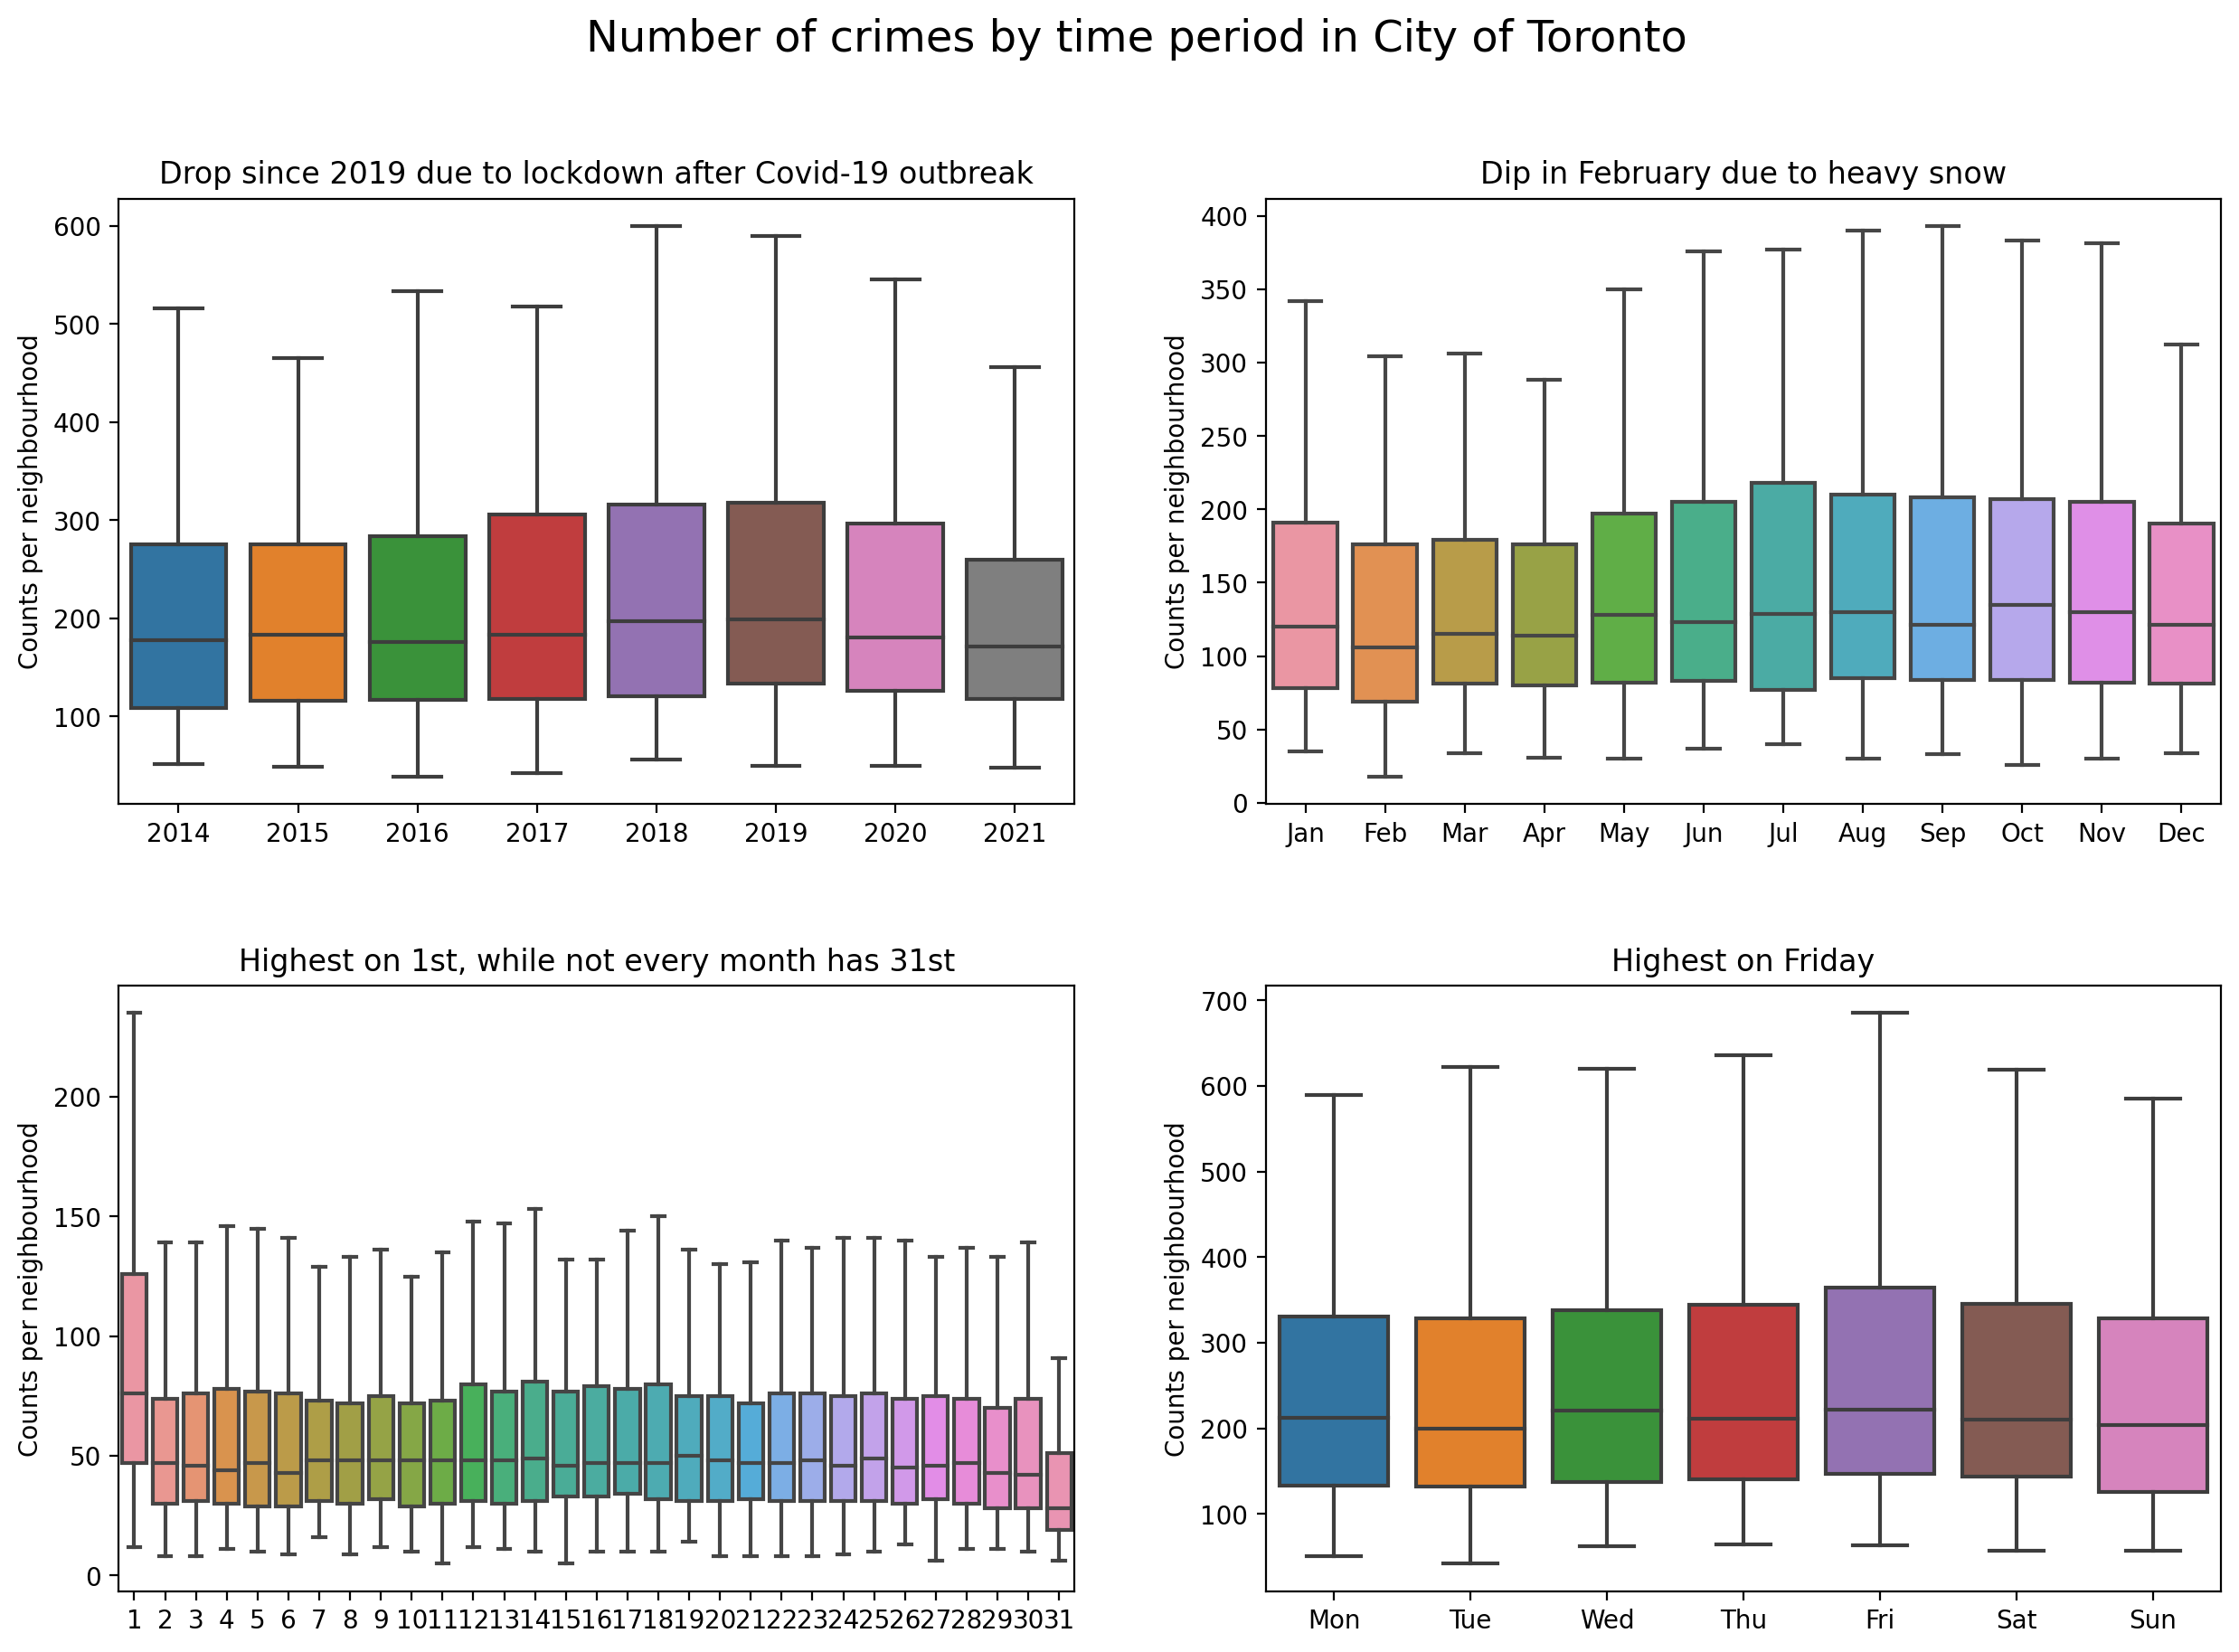

In [125]:
vars = ['occurrence_year', 
        'occurrence_month', 
        'occurrence_day',
        'occurrence_dayofweek']
vars_cat = [[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
            ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            np.arange(1,32,1),
            ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
            ]
titles = ['Drop since 2019 due to lockdown after Covid-19 outbreak',
         'Dip in February due to heavy snow',
         'Highest on 1st, while not every month has 31st',
         'Highest on Friday']

fig, axes = plt.subplots(int(len(vars)/2),2)
plt.subplots_adjust(hspace=0.3)
for var, var_cat, title, ax in zip(vars, vars_cat, titles, axes.flatten()):    
    mci_select[var] = mci_select[var].astype('category').cat.set_categories(var_cat)
    sns.boxplot(data = mci_select.groupby(['neighbourhood', var]).size().reset_index(name='count'), 
                x = var,
                y = 'count',
                showfliers = False,
                ax = ax)
    ax.set_ylabel('Counts per neighbourhood')
    ax.set_xlabel('')
    ax.set_title(title)

fig.suptitle('Number of crimes by time period in City of Toronto', size='xx-large')

# Time trend by type of crime

Text(0.5, 0.98, 'Number of crimes by type in Toronto neighbourhoods')

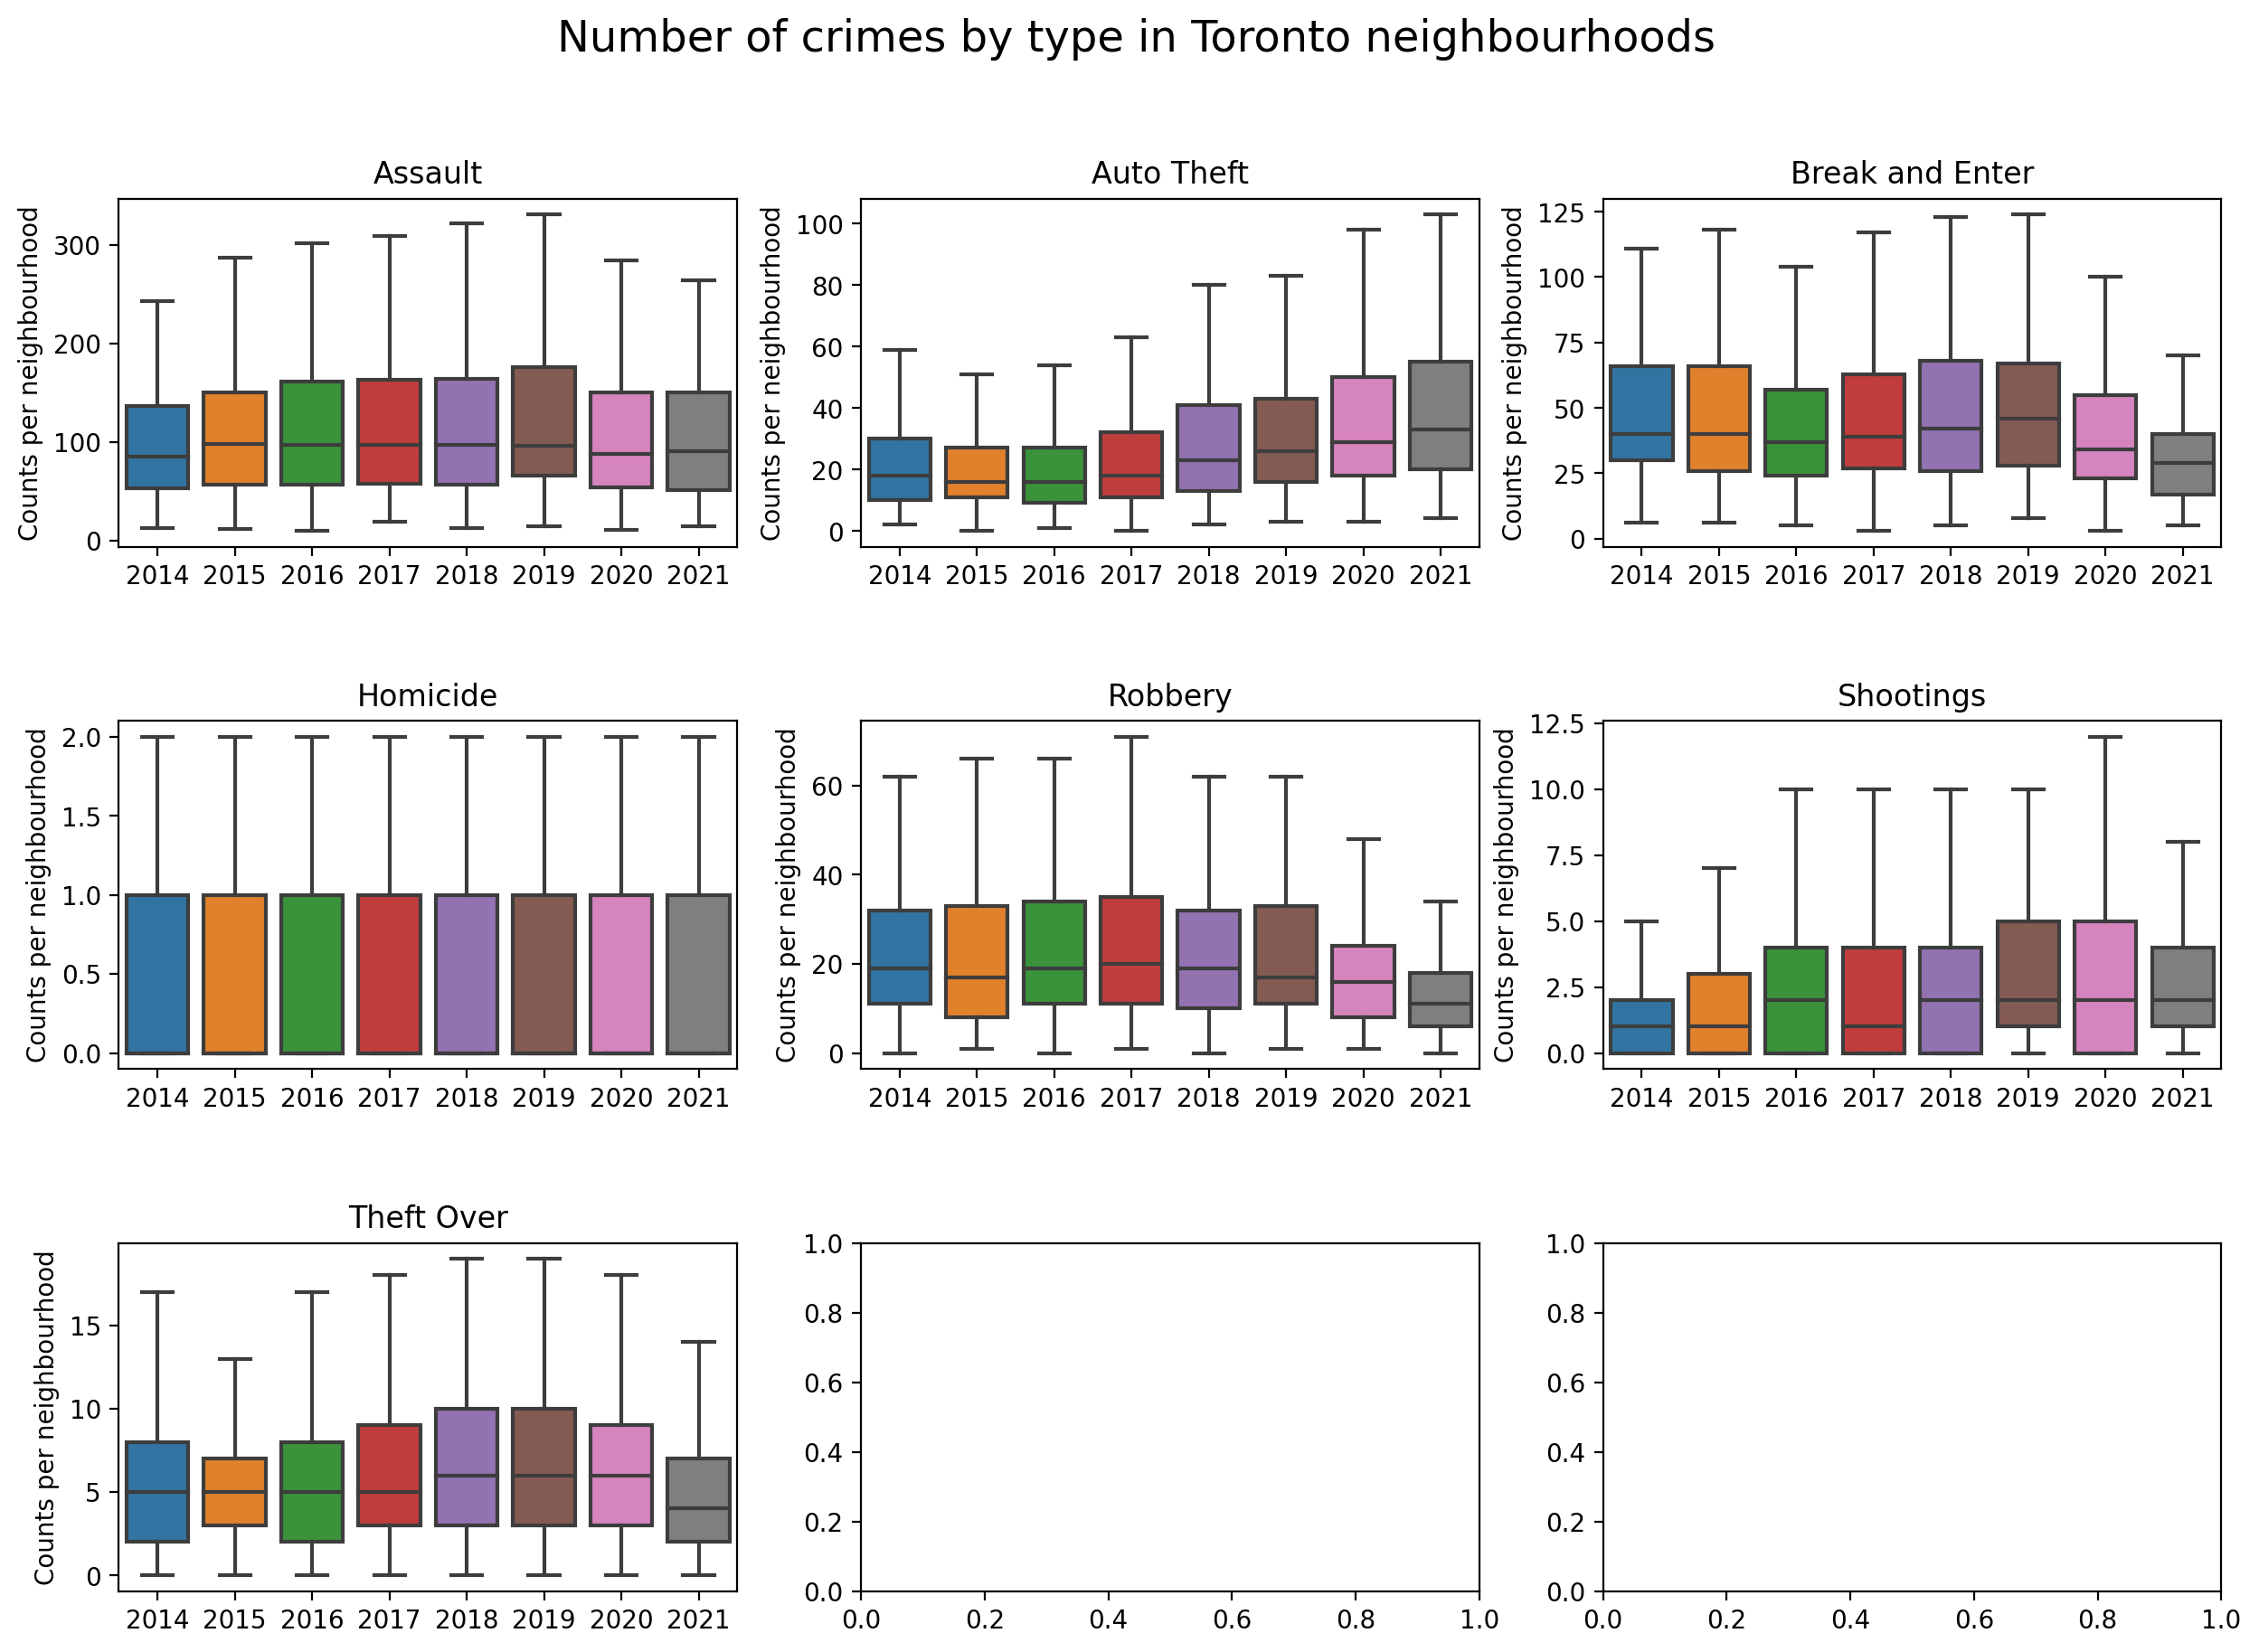

In [20]:
vars = sorted(mci_select.MCI.unique())
fig, axes = plt.subplots(int(math.ceil(len(vars)/3)),3)
plt.subplots_adjust(hspace=0.5)
for var, ax in zip(vars, axes.flatten()):    
    sns.boxplot(data = mci_select[mci_select.MCI == var].groupby(['neighbourhood', 'occurrence_year']).size().reset_index(name='count'), 
                x = 'occurrence_year',
                y = 'count',
                showfliers = False,
                ax = ax)
    ax.set_ylabel('Counts per neighbourhood')
    ax.set_xlabel('')
    ax.set_title(f"{var}")

fig.suptitle('Number of crimes by type in Toronto neighbourhoods', size='xx-large')

# Neighbourhood crime rate and density

In [149]:
crime_by_quarter = pd.read_csv('../data/processed/neighbourhoods_crime.csv')
crime_by_quarter.hood_id = crime_by_quarter.hood_id.astype(str)
crime_by_quarter

neighbourhood hood_id  occurrence_year  occurrence_quarter  \
0       West Humber-Clairville       1             2014                   1   
1       West Humber-Clairville       1             2014                   1   
2       West Humber-Clairville       1             2014                   1   
3       West Humber-Clairville       1             2014                   1   
4       West Humber-Clairville       1             2014                   1   
...                        ...     ...              ...                 ...   
107515     Mount Pleasant East      99             2021                   4   
107516     Mount Pleasant East      99             2021                   1   
107517     Mount Pleasant East      99             2021                   2   
107518     Mount Pleasant East      99             2021                   3   
107519     Mount Pleasant East      99             2021                   4   

             area    population              MCI     type      value  
0       30.145225  34745.000000          Assault    count  56.000000  
1       30.145225  34745.000000       Auto Theft    count  64.000000  
2       30.145225  34745.000000  Break and Enter    count  41.000000  
3       30.145225  34745.000000         Homicide    count   0.000000  
4       30.145225  34745.000000          Robbery    count  13.000000  
...           ...           ...              ...      ...        ...  
107515   3.088902  18133.437233       Theft Over  density   0.000000  
107516   3.088902  18133.437233              MCI  density   7.122271  
107517   3.088902  18133.437233              MCI  density  12.949583  
107518   3.088902  18133.437233              MCI  density  10.035927  
107519   3.088902  18133.437233              MCI  density  11.007146  

[107520 rows x 9 columns]

In [153]:
crime_by_year = crime_by_quarter.groupby(['hood_id', 'occurrence_year', 'MCI', 'type']).value.sum().reset_index()
crime_by_year

hood_id  occurrence_year         MCI     type       value
0           1             2014     Assault    count  297.000000
1           1             2014     Assault  density    9.852306
2           1             2014     Assault     rate  854.799252
3           1             2014  Auto Theft    count  313.000000
4           1             2014  Auto Theft  density   10.383070
...       ...              ...         ...      ...         ...
26875      99             2021   Shootings  density    0.000000
26876      99             2021   Shootings     rate    0.000000
26877      99             2021  Theft Over    count    3.000000
26878      99             2021  Theft Over  density    0.971219
26879      99             2021  Theft Over     rate   16.544023

[26880 rows x 5 columns]

In [127]:
neighbourhoods = gpd.read_file('../data/processed/neighbourhoods.geojson')

In [154]:
neighbourhoods_crime = neighbourhoods[['hood_id', 'geometry']].drop_duplicates(subset = 'hood_id').merge(crime_by_year, on='hood_id', how='left')
neighbourhoods_crime

hood_id                                           geometry  \
0          97  POLYGON ((-79.39115 43.68108, -79.39137 43.680...   
1          97  POLYGON ((-79.39115 43.68108, -79.39137 43.680...   
2          97  POLYGON ((-79.39115 43.68108, -79.39137 43.680...   
3          97  POLYGON ((-79.39115 43.68108, -79.39137 43.680...   
4          97  POLYGON ((-79.39115 43.68108, -79.39137 43.680...   
...       ...                                                ...   
26875      17  POLYGON ((-79.48036 43.62107, -79.48029 43.621...   
26876      17  POLYGON ((-79.48036 43.62107, -79.48029 43.621...   
26877      17  POLYGON ((-79.48036 43.62107, -79.48029 43.621...   
26878      17  POLYGON ((-79.48036 43.62107, -79.48029 43.621...   
26879      17  POLYGON ((-79.48036 43.62107, -79.48029 43.621...   

       occurrence_year         MCI     type       value  
0                 2014     Assault    count   18.000000  
1                 2014     Assault  density   15.499636  
2                 2014     Assault     rate  142.891165  
3                 2014  Auto Theft    count    2.000000  
4                 2014  Auto Theft  density    1.722182  
...                ...         ...      ...         ...  
26875             2021   Shootings  density    0.424978  
26876             2021   Shootings     rate    7.564610  
26877             2021  Theft Over    count   12.000000  
26878             2021  Theft Over  density    1.699913  
26879             2021  Theft Over     rate   30.258438  

[26880 rows x 6 columns]

In [155]:
crime_type = neighbourhoods_crime.MCI.unique()
crime_type

array(['Assault', 'Auto Theft', 'Break and Enter', 'Homicide', 'MCI',
       'Robbery', 'Shootings', 'Theft Over'], dtype=object)

In [156]:
# set custom order for display
custom_crime_order = ['MCI','Assault', 'Auto Theft','Break and Enter','Robbery','Theft Over','Homicide','Shootings']
crime_years = sorted(neighbourhoods_crime.occurrence_year.unique())

In [157]:
def plot_crime(var, title):
    fig, axes = plt.subplots(len(crime_years), len(custom_crime_order))

    for j in range(axes.shape[1]):
        # fix the range for each type of crime so we can compare across years
        vmin, vmax = neighbourhoods_crime[(neighbourhoods_crime['MCI'] == custom_crime_order[j]) & 
                                          (neighbourhoods_crime['type'] == var)].value.agg(['min', 'max'])
        norm = TwoSlopeNorm(vmin=vmin, vcenter= np.mean([vmin, vmax]), vmax=vmax)
        print(custom_crime_order[j])
        for i in range(axes.shape[0]):  
            try:
                neighbourhoods_crime[(neighbourhoods_crime['MCI'] == custom_crime_order[j]) & 
                                     (neighbourhoods_crime['occurrence_year'] == crime_years[i]) & 
                                     (neighbourhoods_crime['type'] == var)].\
                                         plot(column = 'value', 
                                              cmap = 'viridis',
                                              norm = norm,
                                              ax = axes[i, j])
            except:
                print(f"problem with {custom_crime_order[j]} and {crime_years[i]}")
                break
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].set_yticks([])
            if i == 0:
                axes[i,j].set_title(custom_crime_order[j])
            if j == 0:
                axes[i,j].set_ylabel(crime_years[i], rotation=90, size='large')

    fig.suptitle(title, size='xx-large')

## plot map

MCI
Assault
Auto Theft
Break and Enter
Robbery
Theft Over
Homicide
Shootings


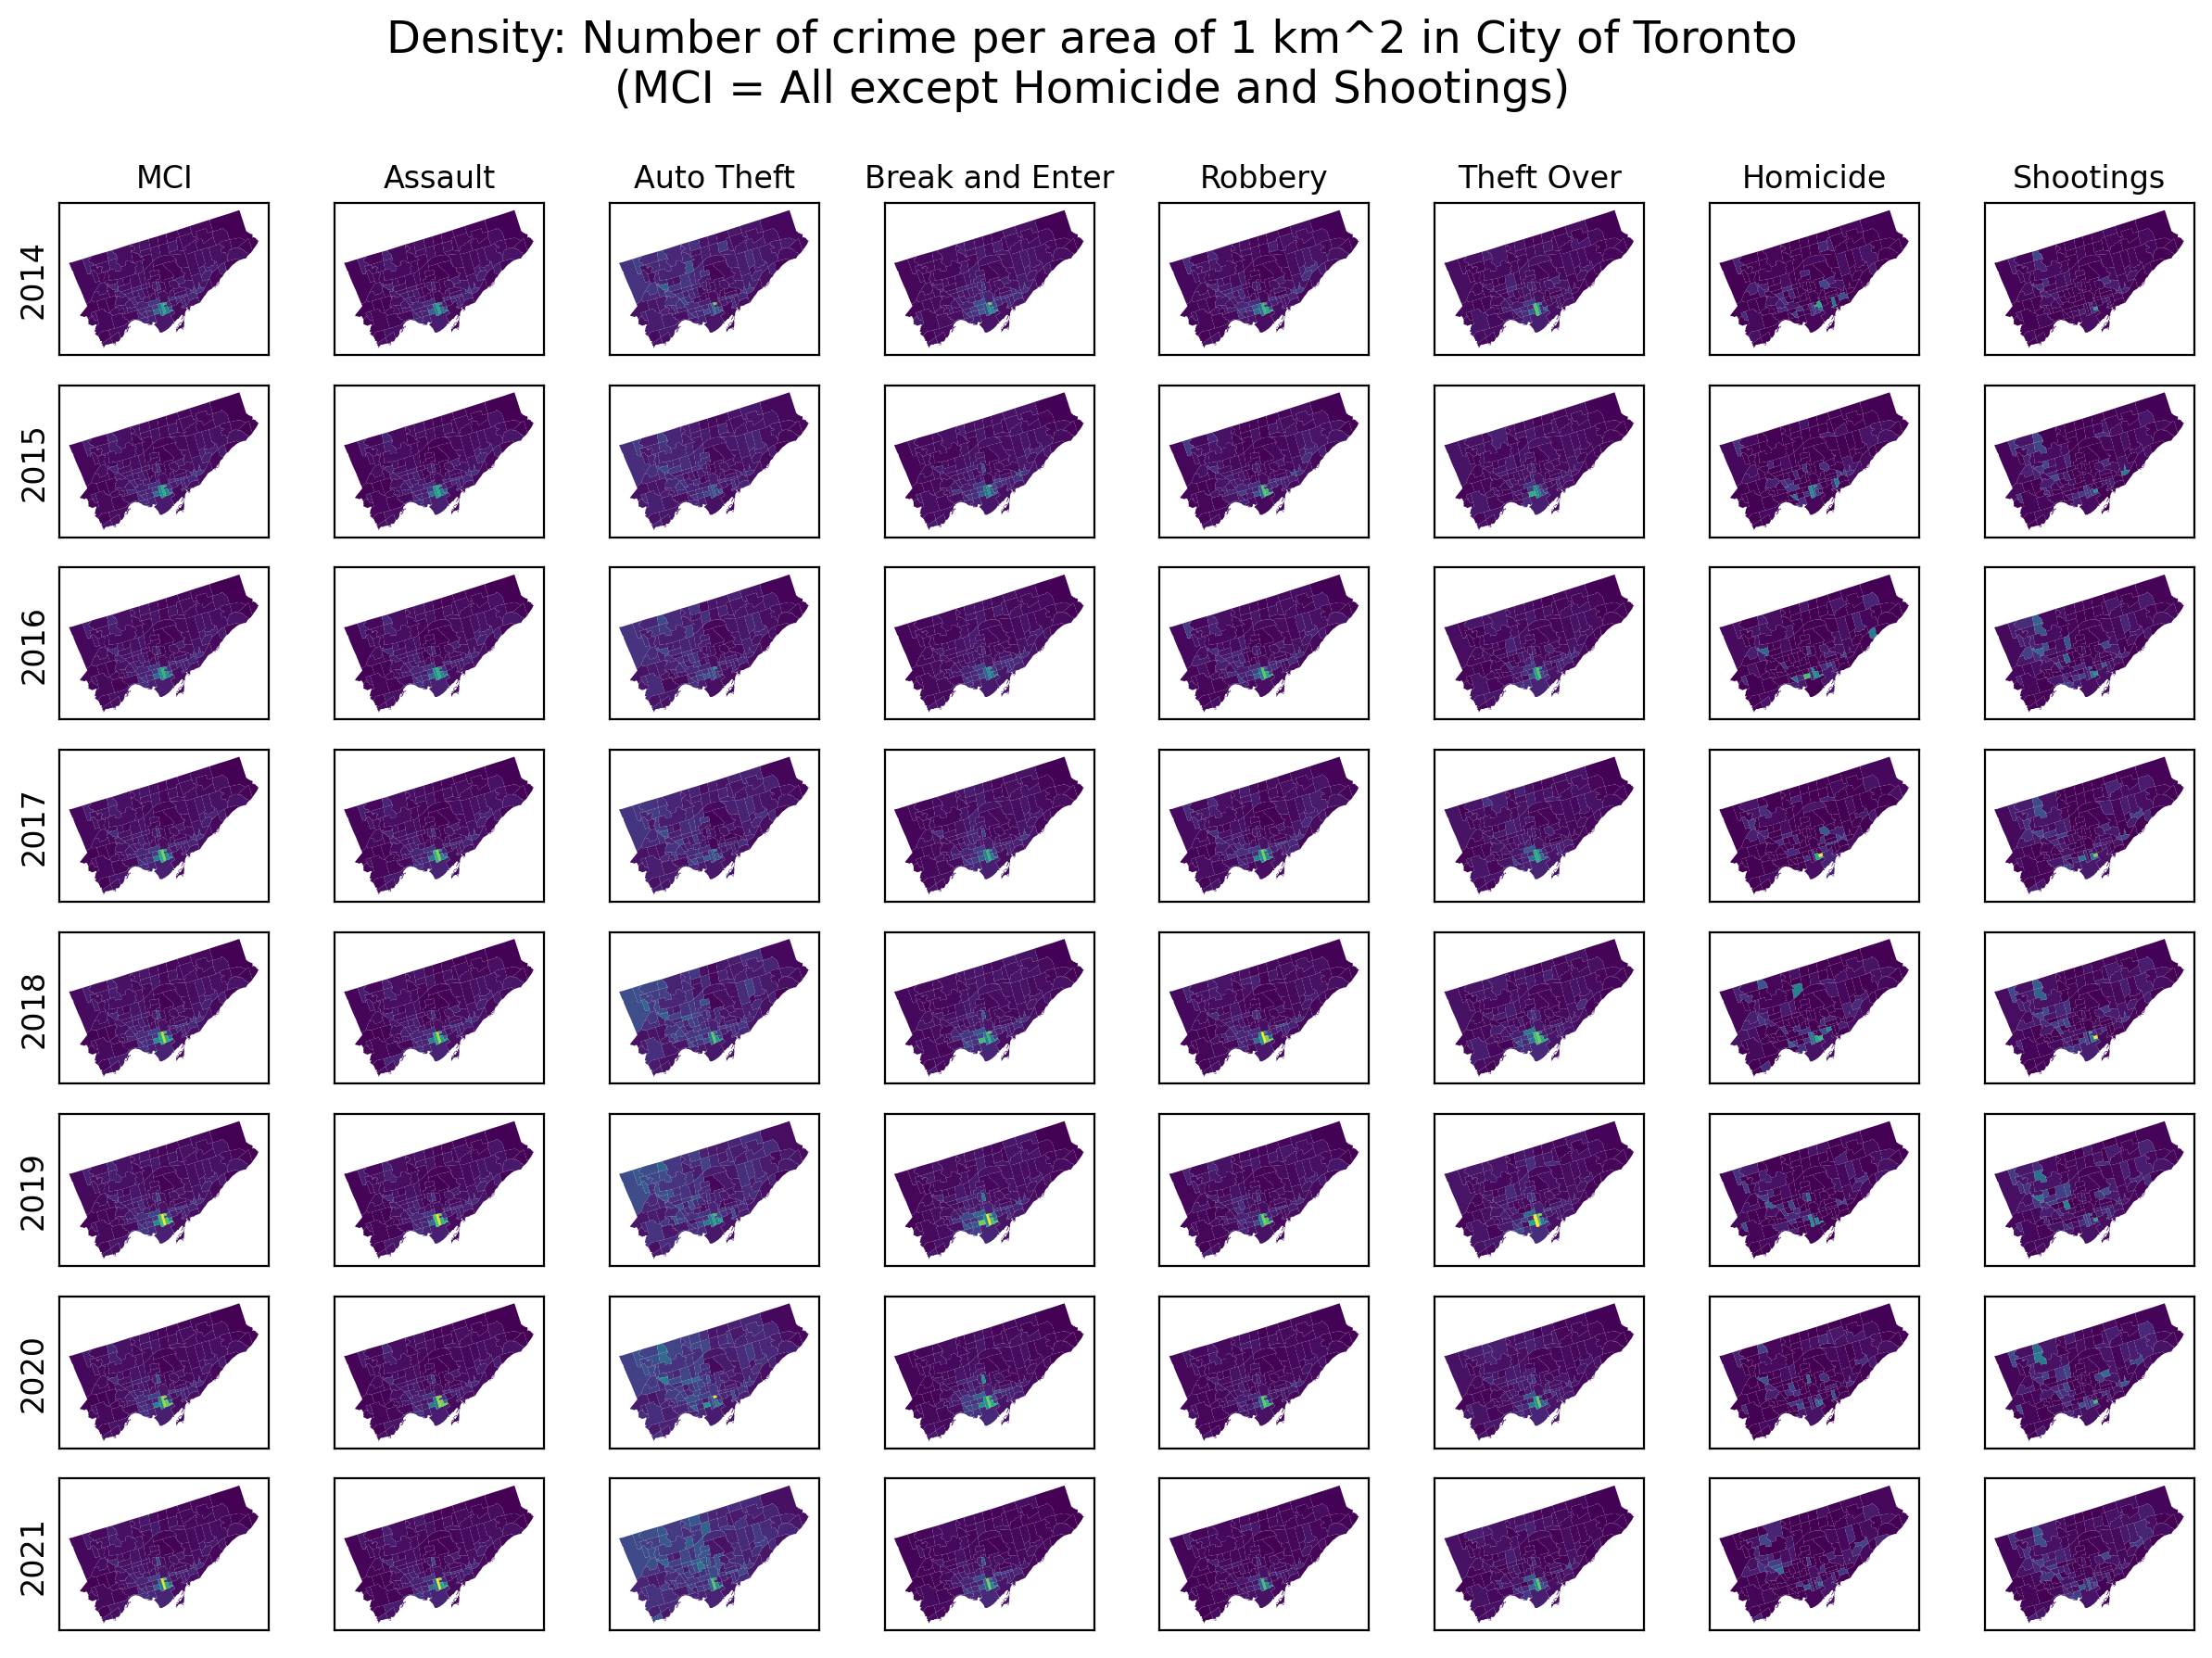

In [164]:
plot_crime('density', 'Density: Number of crime per area of 1 km^2 in City of Toronto\n(MCI = All except Homicide and Shootings)')

MCI
Assault
Auto Theft
Break and Enter
Robbery
Theft Over
Homicide
Shootings


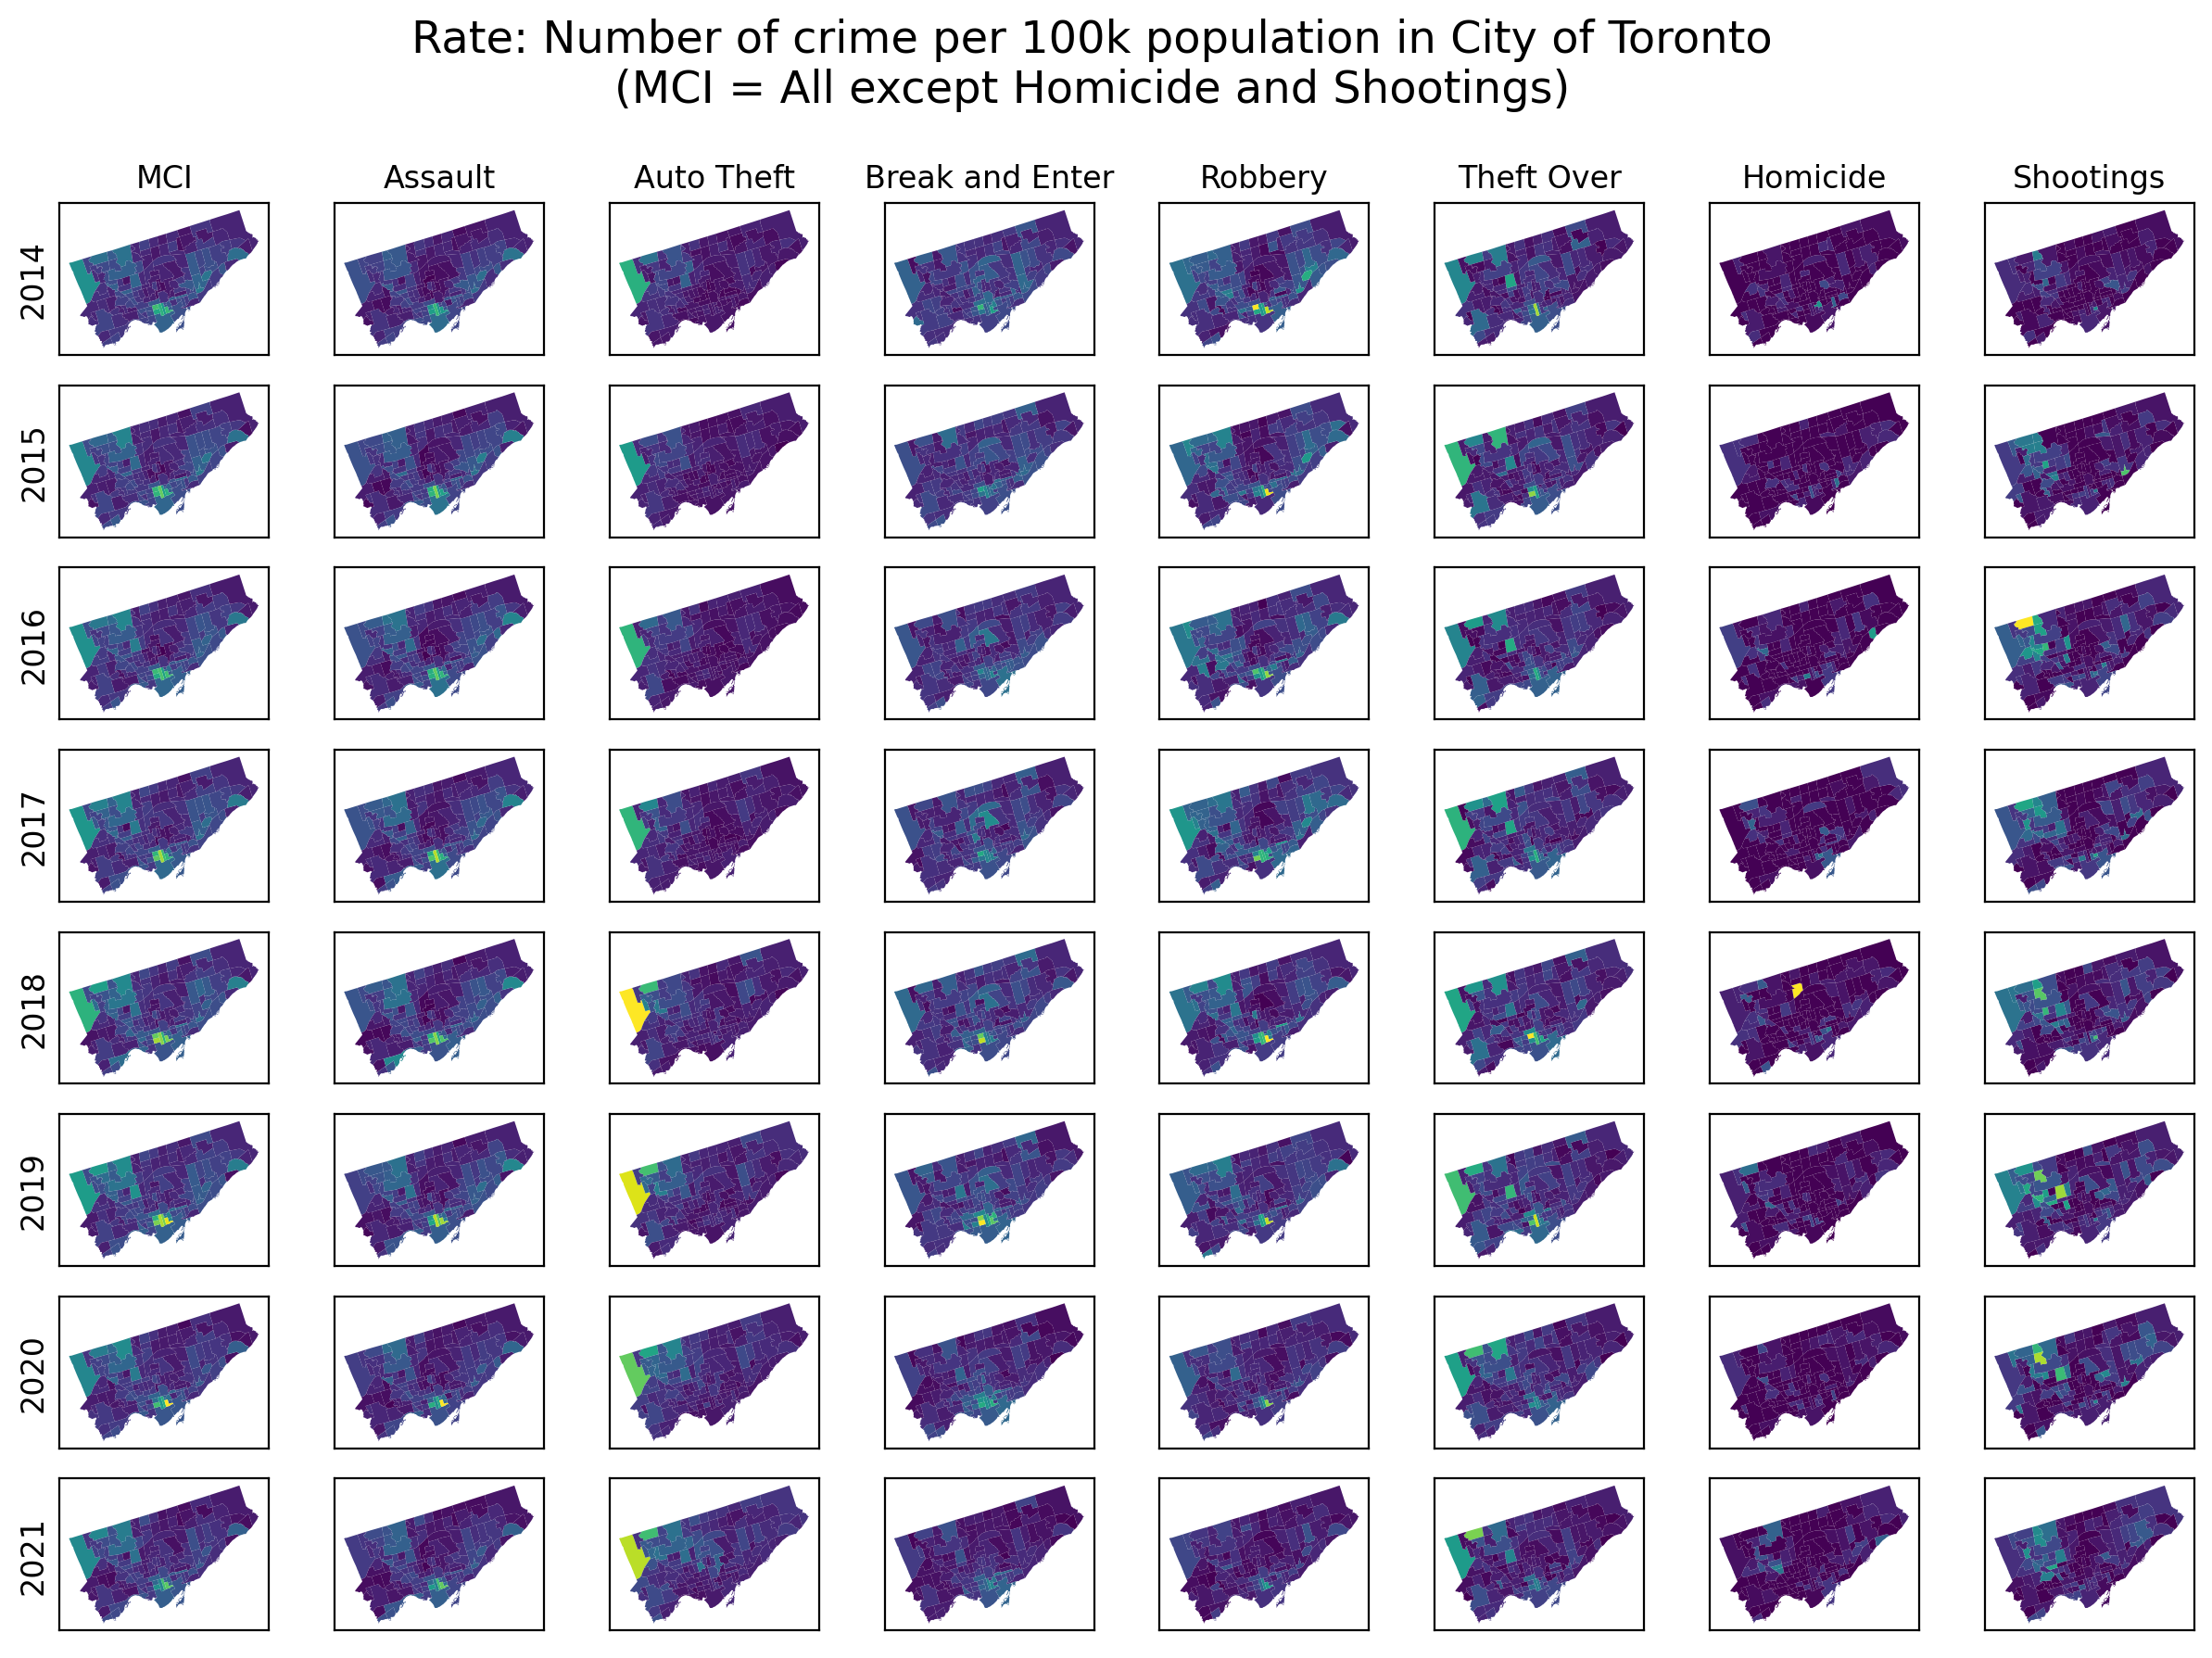

In [165]:
plot_crime('rate', 'Rate: Number of crime per 100k population in City of Toronto\n(MCI = All except Homicide and Shootings)')

MCI
Assault
Auto Theft
Break and Enter
Robbery
Theft Over
Homicide
Shootings


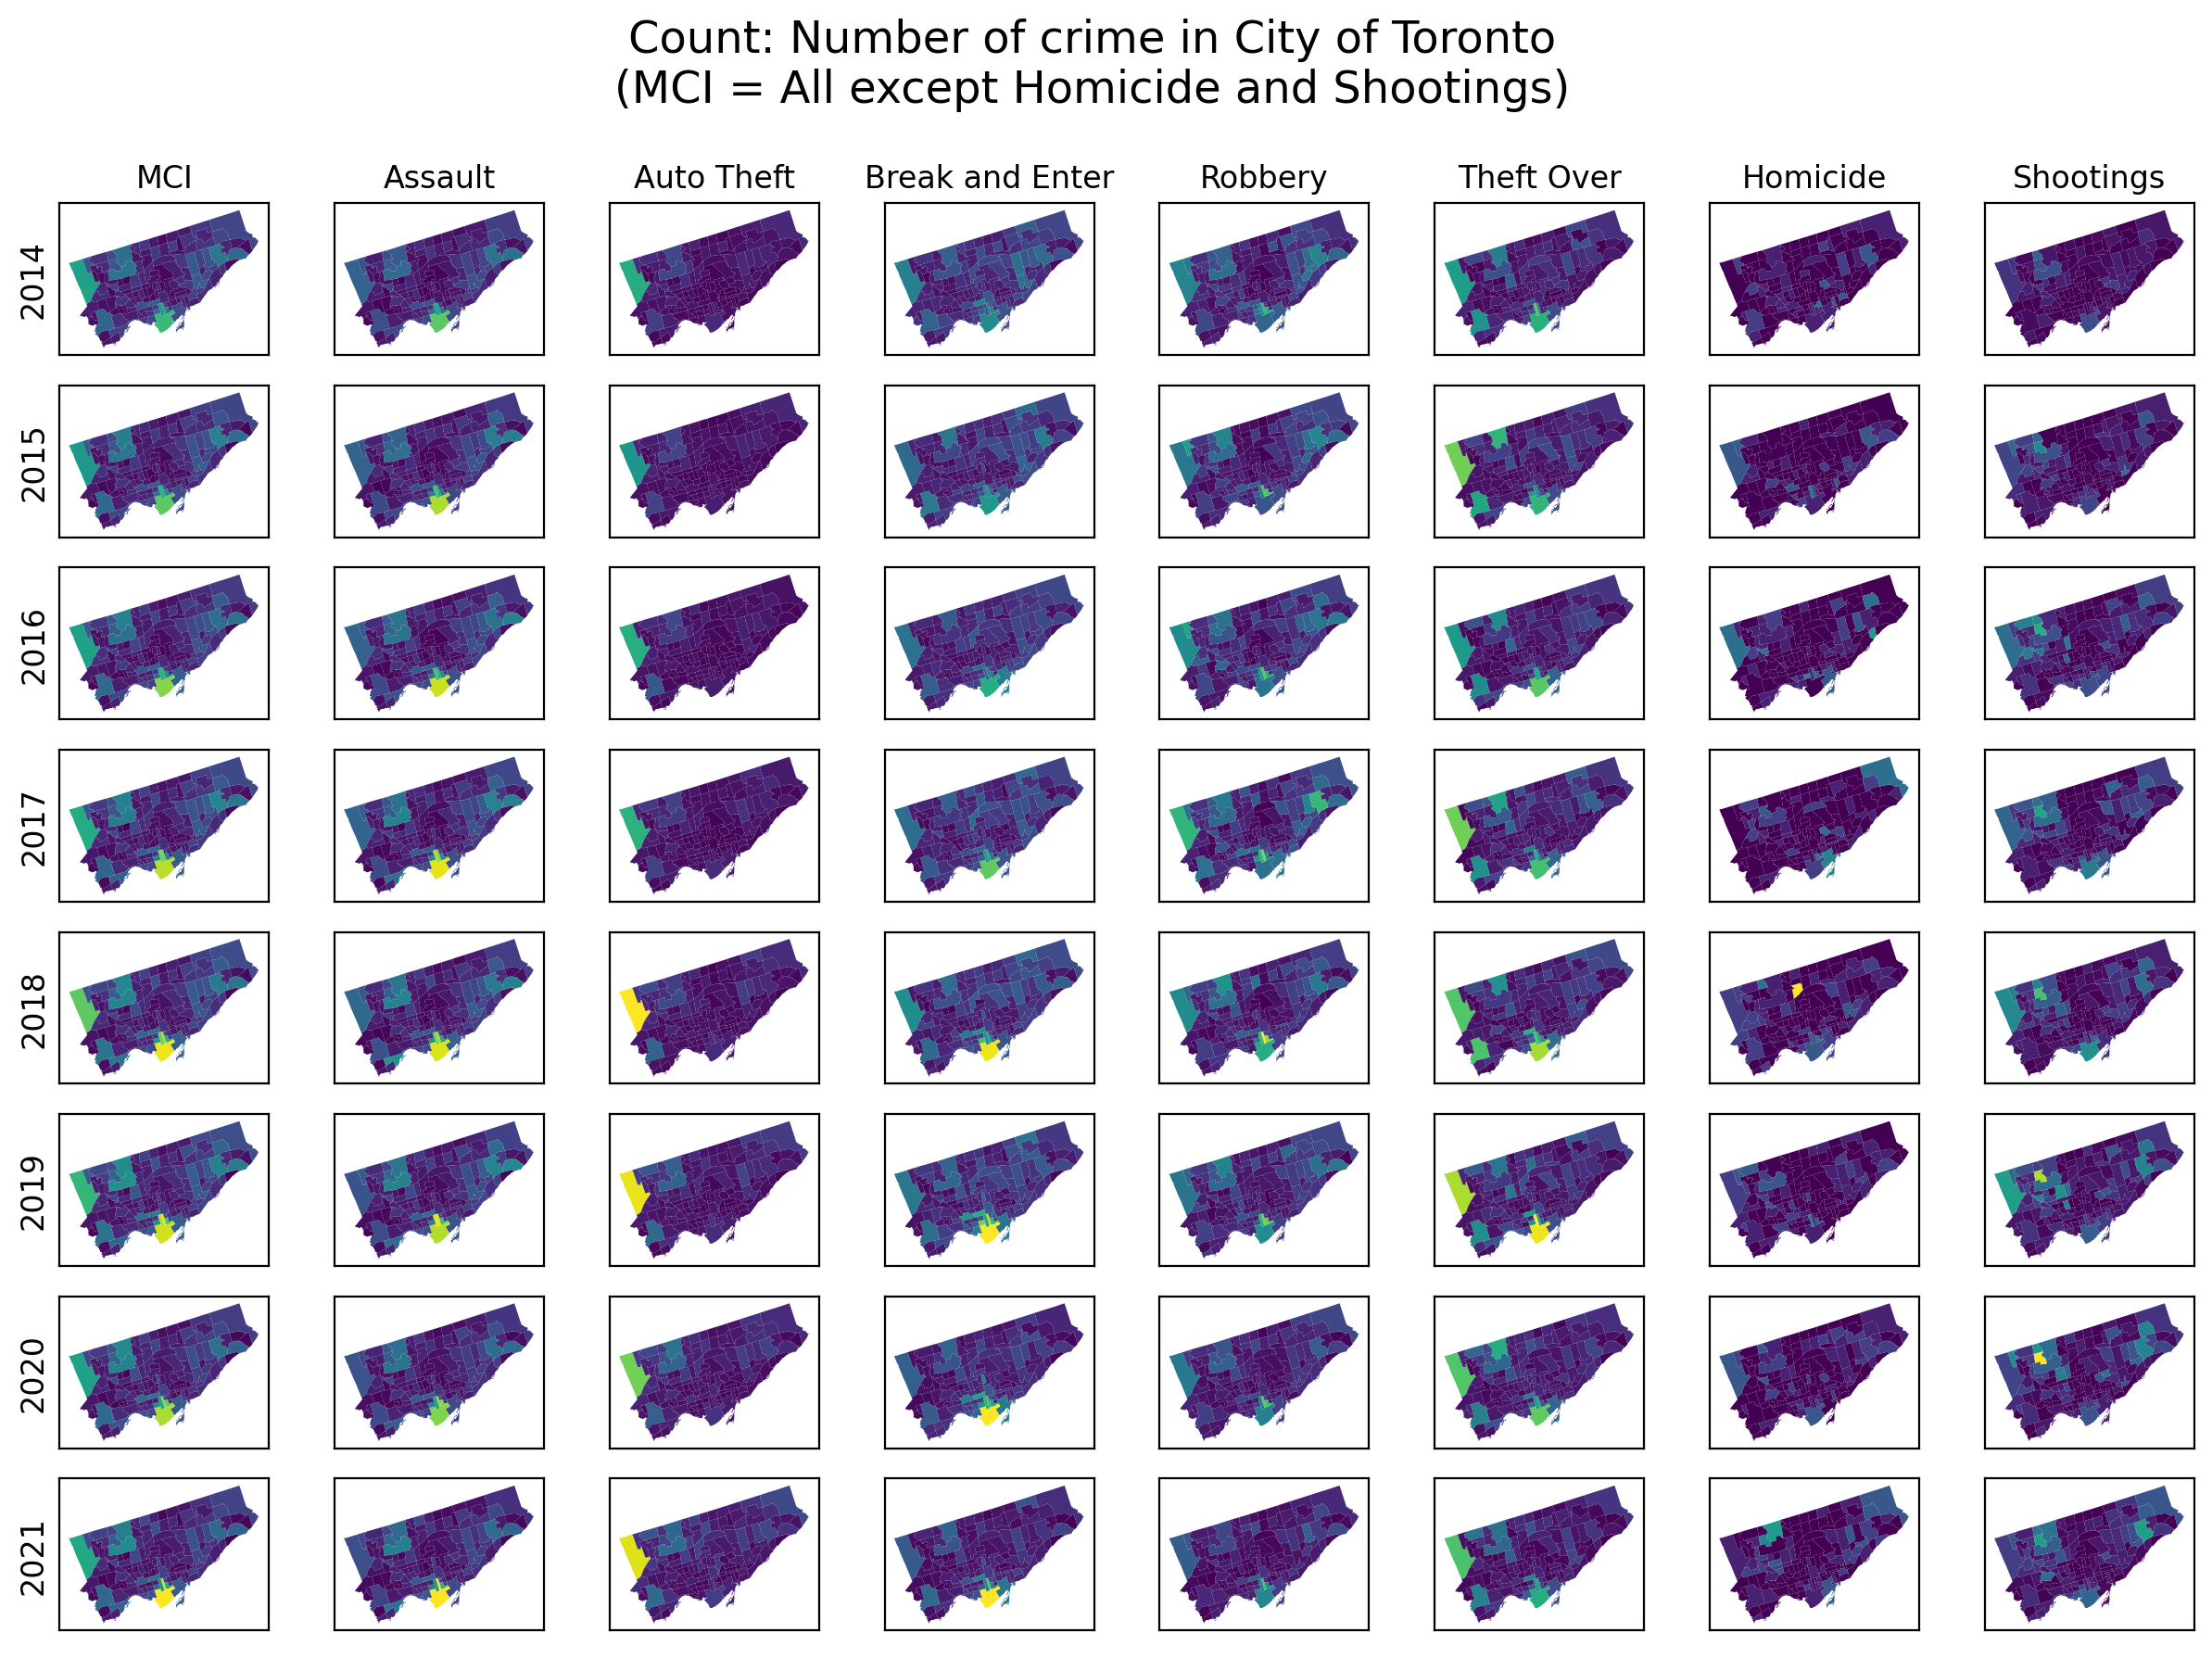

In [166]:
plot_crime('count', 'Count: Number of crime in City of Toronto\n(MCI = All except Homicide and Shootings)')

Text(0.5, 257.52801096780723, 'Longitude')

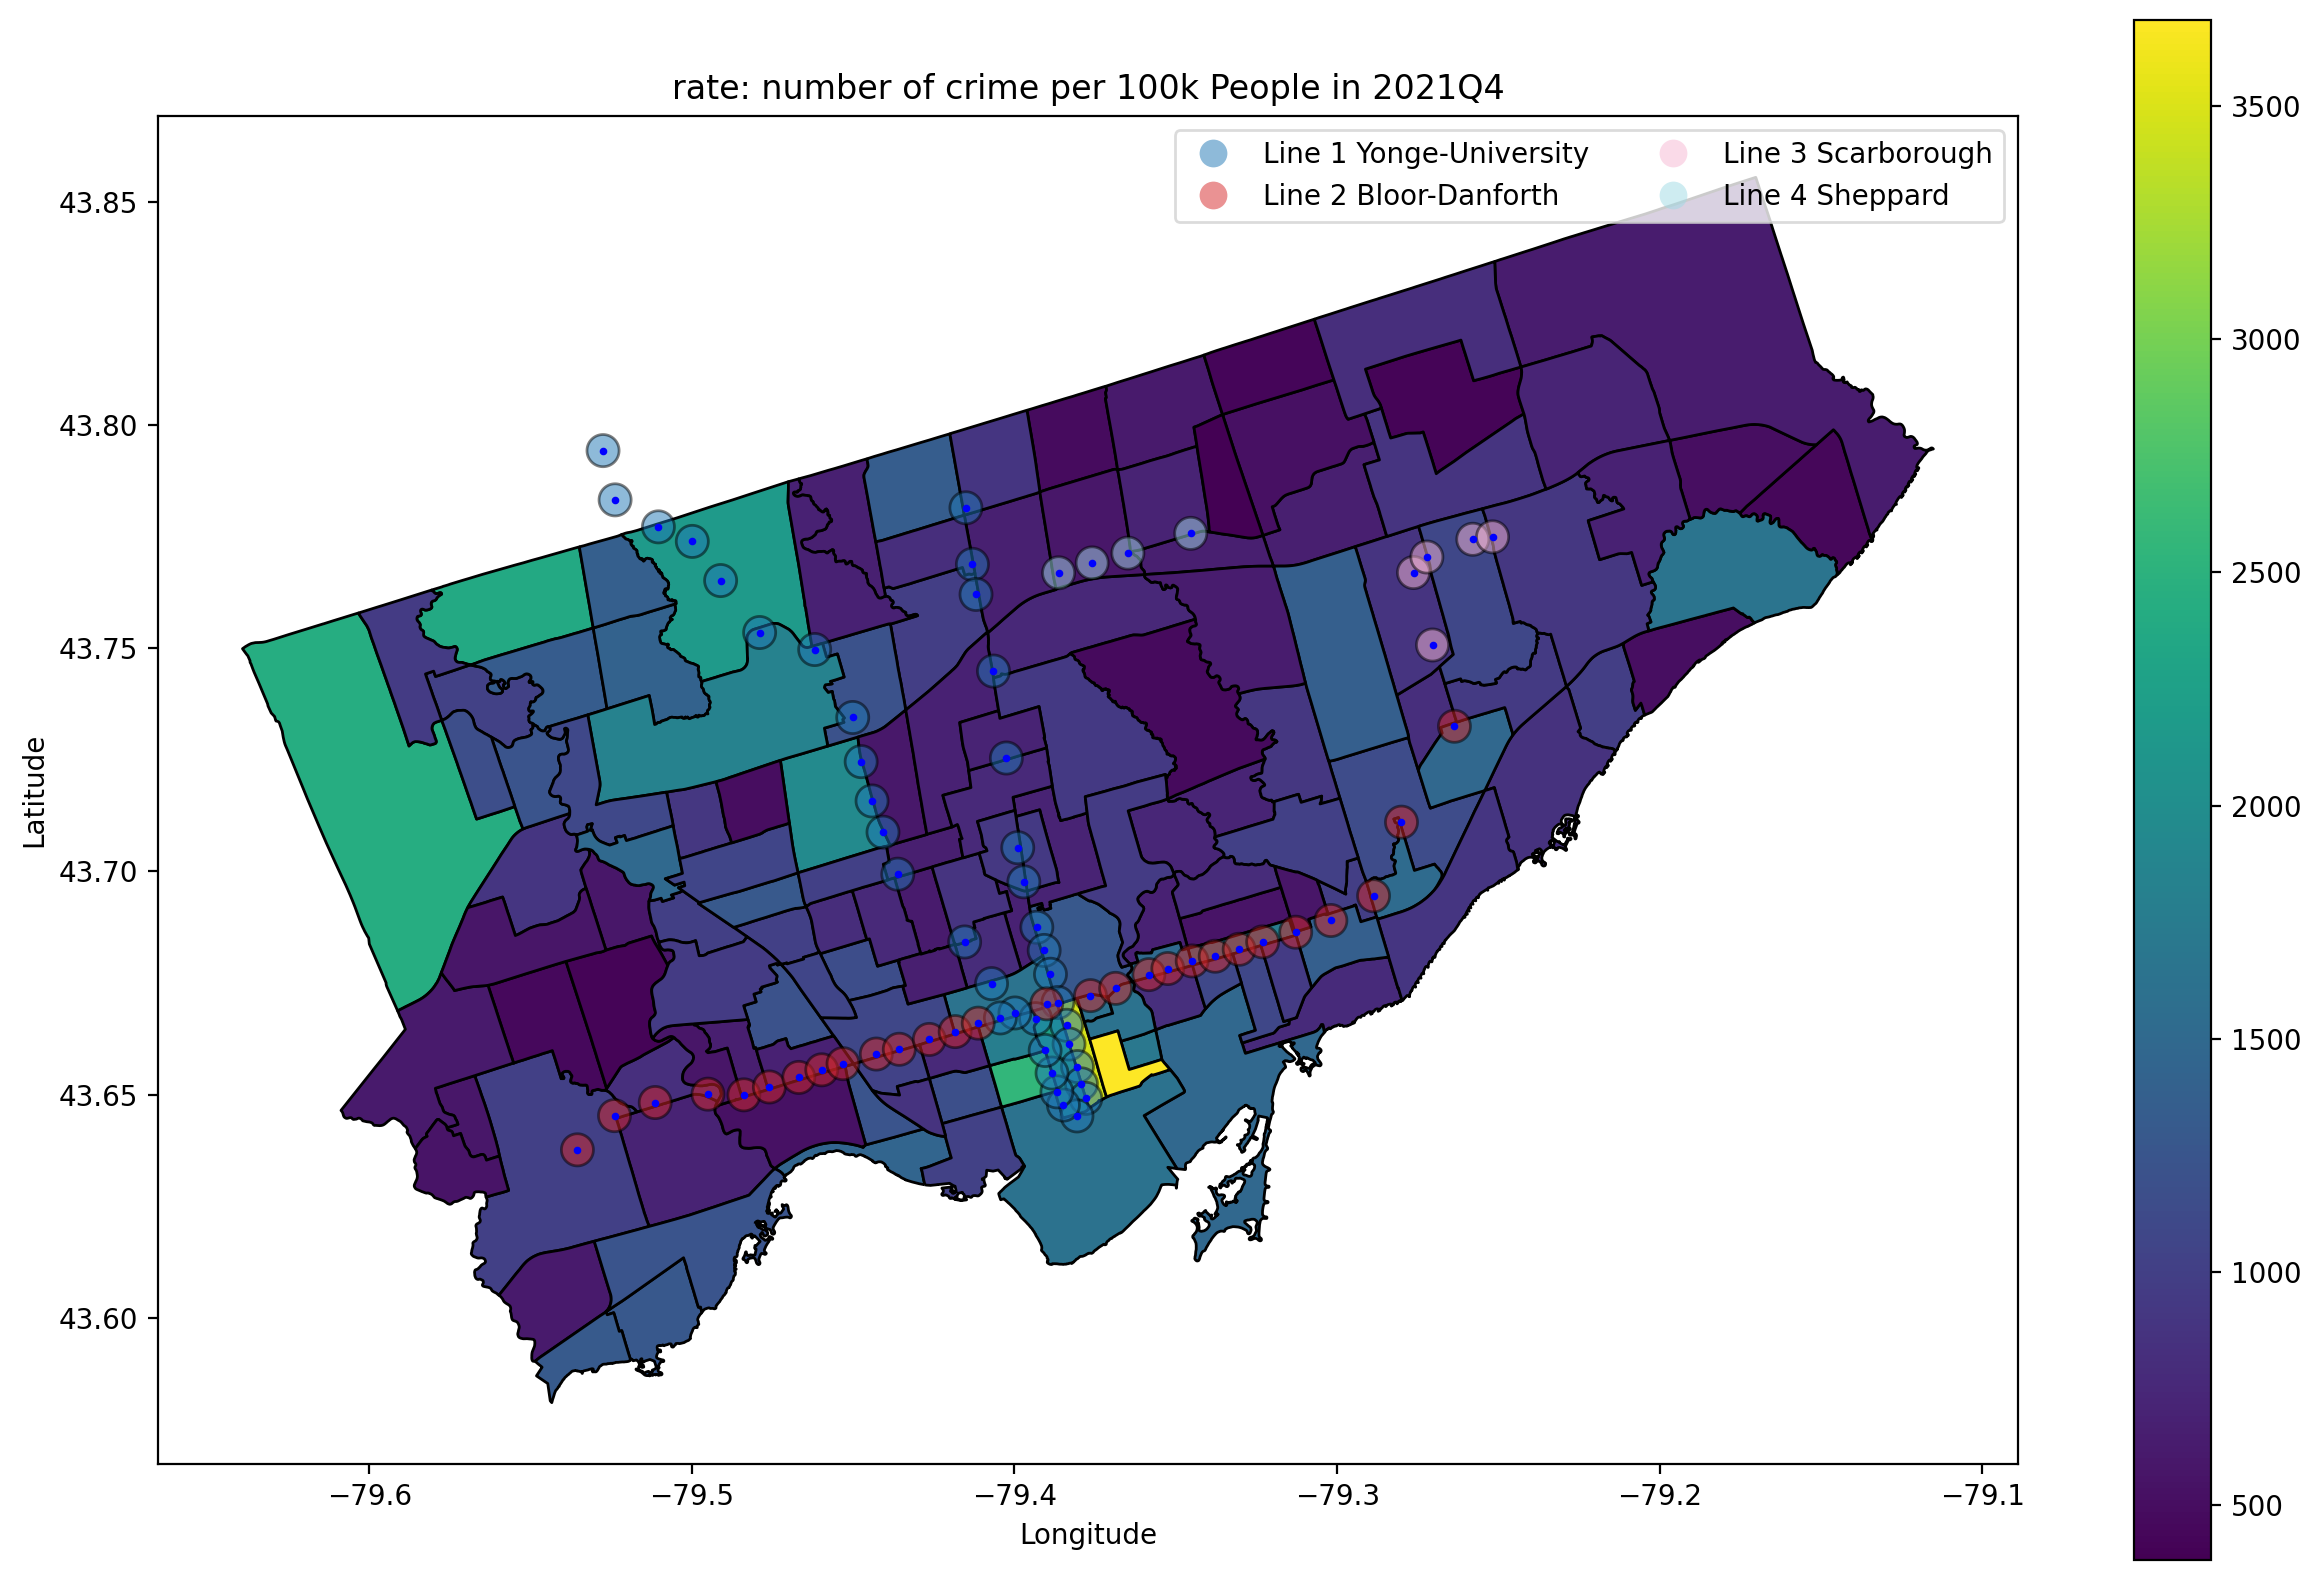

In [169]:
var = "rate"
MCI_type = "MCI"
year = 2021
ax = neighbourhoods_crime[(neighbourhoods_crime['MCI'] == MCI_type) & 
                          (neighbourhoods_crime['occurrence_year'] == year) & 
                          (neighbourhoods_crime['type'] == var)].\
                              plot(column = 'value', 
                                   edgecolor = 'black',
                                   cmap = 'viridis',
                                   # norm = norm,
                                   legend = True)

stations_area.plot(column = 'line', 
                edgecolor = 'black', 
                alpha = 0.5,
                cmap = 'tab20',
                legend = True,
                legend_kwds = {'loc': 'upper right', 
                                'ncol': 2,
                                'edgecolor': 'lightgrey'},
                ax = ax)
stations_point.plot(ax=ax, 
                    color = 'blue', 
                    markersize = 3)

ax.set_title(var + ": number of crime per 100k People in " + str(year))
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

# Crime around subway stations

In [177]:
mci_select['geometry'] = mci_select.apply(lambda x: shapely.geometry.Point(x['longitude'], x['latitude']), axis=1)
mci_point = gpd.GeoDataFrame(mci_select, crs='epsg:' + str(epsg_3d), geometry='geometry')

c:\Users\willi\miniconda3\envs\police\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



In [190]:
custom_crime_order

['MCI',
 'Assault',
 'Auto Theft',
 'Break and Enter',
 'Robbery',
 'Theft Over',
 'Homicide',
 'Shootings']

In [197]:
year = 2021
crime_around_stations = gpd.sjoin(mci_point.loc[(mci_point['occurrence_year'] == year), ['occurrence_unique_id', 'hood_id', 'MCI', 'geometry']], 
                                  stations_area[['station', 'geometry']],
                                  predicate='intersects')
crime_around_stations

occurrence_unique_id hood_id         MCI                    geometry  \
23731        GO-20211035565      14     Assault  POINT (-79.53703 43.63769)   
23912        GO-20211366573      14     Assault  POINT (-79.53760 43.63898)   
23916        GO-20211386980      14     Assault  POINT (-79.53376 43.63782)   
23957        GO-20212467046      14     Assault  POINT (-79.53376 43.63782)   
23958        GO-20212477260      14     Assault  POINT (-79.53376 43.63782)   
...                     ...     ...         ...                         ...   
270873       GO-20211096641     137     Assault  POINT (-79.25146 43.77214)   
270874       GO-20211096641     137     Assault  POINT (-79.25146 43.77214)   
270895       GO-20211210508     137     Assault  POINT (-79.25220 43.77457)   
271240        GO-2021835964     137  Auto Theft  POINT (-79.25050 43.77667)   
279558       GO-20212463489     127   Shootings  POINT (-79.25220 43.77457)   

        index_right  station  
23731            38  kipling  
23912            38  kipling  
23916            38  kipling  
23957            38  kipling  
23958            38  kipling  
...             ...      ...  
270873           70  mccowan  
270874           70  mccowan  
270895           70  mccowan  
271240           70  mccowan  
279558           70  mccowan  

[8075 rows x 6 columns]

In [222]:
station_rank = crime_around_stations.groupby(['station']).size().sort_values(ascending=False).reset_index(name = 'crime_count')
station_rank

station  crime_count  crime_rank
0            dundas          719        73.0
1           college          457        72.0
2         wellesley          420        71.0
3       bloor yonge          404        70.0
4             queen          392        69.0
..              ...          ...         ...
68  york university           14         5.0
69         old mill           12         4.0
70   downsview park           11         3.0
71  pioneer village            9         2.0
72        ellesmere            6         1.0

[73 rows x 3 columns]

Text(0.5, 1.0, 'Distribution of crime around stations seems in line with crime density across neighbourhoods')

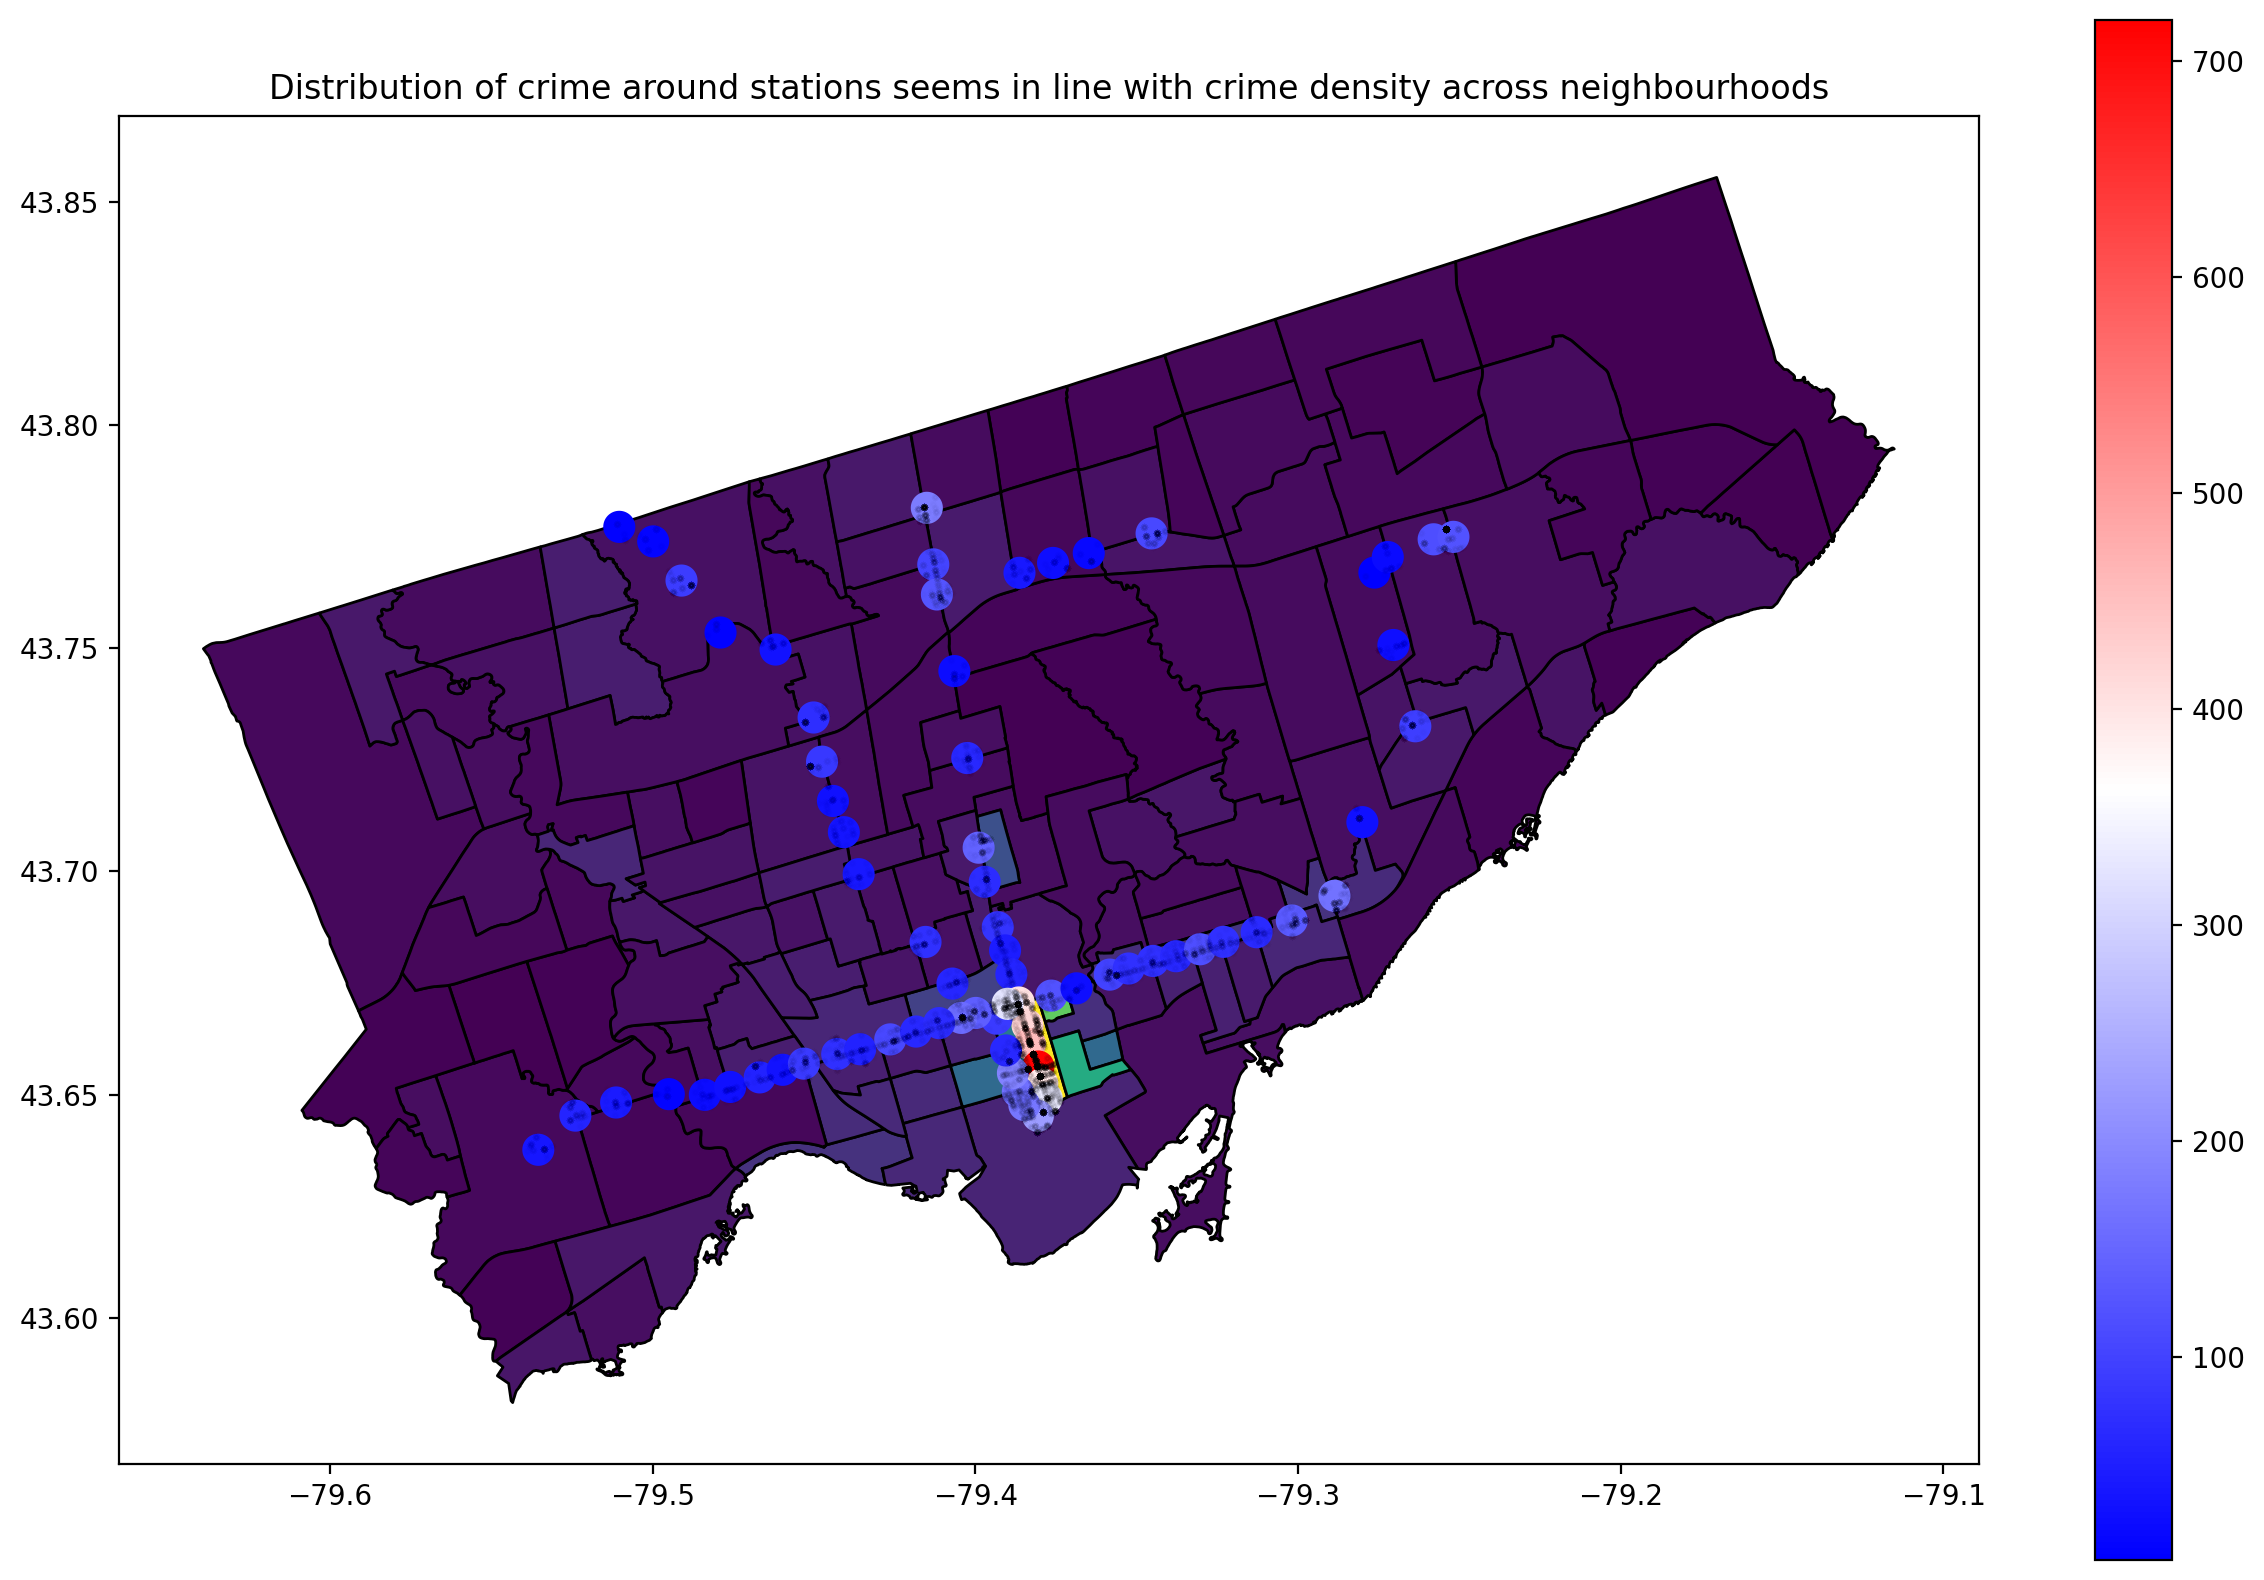

In [231]:
MCI_type = "MCI"
year = 2021
var = 'density'
ax = neighbourhoods_crime[(neighbourhoods_crime['MCI'] == MCI_type) & 
                          (neighbourhoods_crime['occurrence_year'] == year) & 
                          (neighbourhoods_crime['type'] == var)].\
                              plot(column = 'value', 
                                   edgecolor = 'black',
                                   cmap = 'viridis',
                                   )
stations_area.merge(station_rank, on='station', how='left').plot(
    column = 'crime_count', 
    ax=ax, cmap = 'bwr', markersize = 3, legend = True)
crime_around_stations.plot(ax=ax, color = 'black', markersize = 3, alpha = 0.01)
ax.set_title("Distribution of crime around stations seems in line with crime density across neighbourhoods")